![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">


# Python for Genomics 
## Section 8: Reading Alignments Exercises


In the lesson, we imported the clustal file from the early outbreak data. 

Can you import and analyze the late outbreak data as well? 

Are the GP genes as conserved for later in the outbreak?

The file for this exercise are located in the /exercise_data/ folder

* late_outbreak_GPgenes.clustal

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

First convert the clustal file to a fasta file.

In [2]:
# your code here...

In [4]:
from Bio import AlignIO

late_fasta_aln = AlignIO.convert('exercise_data/late_outbreak_GPgenes.clustal', 'clustal', 'exercise_data/solutions/late_outbreak_GPgenes.fasta', 'fasta')
late_fasta_aln

1

Now read in your new fasta file and save it as an object in TabularMSA format

In [ ]:
# your code here...

In [6]:
from skbio import DNA, TabularMSA

#this creates a `TabularMSA` object using our newly converted fasta file, and specifying that it is DNA
late_tabbed_alignment = TabularMSA.read('exercise_data/solutions/late_outbreak_GPgenes.fasta', format='fasta', constructor=DNA)

# reassigns the default ids (1 to n) to the fasta ID's instead of default 0,1,3 numbering
late_tabbed_alignment.reassign_index(minter='id')
late_tabbed_alignment

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 174
    position count: 2406
-----------------------------------------------------------------------
GATGAAGATTAAGCCGACAGTGAGCGTAATCTT ... AAGAATGATAAACTTGATGAAGATTAAGAAAAA
GATGAAGATTAAGCCGACAGTGAGCGTAATCTT ... AAGAATGATAAACTTGATGAAGATTAAGAAAAA
...
GATGAAGATTAAGCCGACAGTGAGCGTAATCTT ... AAGAATGATAAACTTGATGAAGATTAAGAAAAA
GATGAAGATTAAGCCGACAGTGAGCGTAATCTT ... AAGAATGATAAACTTGATGAAGATTAAGAAAAA

Calculate the consensus sequence from your tabbed alignment object:

In [ ]:
# your code here...

In [10]:
late_consensus = late_tabbed_alignment.consensus()
late_consensus

DNA
----------------------------------------------------------------------
Stats:
    length: 2406
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 45.59%
----------------------------------------------------------------------
0    GATGAAGATT AAGCCGACAG TGAGCGTAAT CTTCATCTCT CTTAGATTAT TTGTCTTCCA
60   GAGTAGGGGT CATCAGGTCC TTTTCAATTG GATAACCAAA ATAAGCTTCA CTAGAAGGAT
...
2340 AACAAGGTTT GACATCAATC TAGCTATATC TTTAAGAATG ATAAACTTGA TGAAGATTAA
2400 GAAAAA

Calculate the conservation array from your tabbed alignment object (we can say 'nan' for degenerate_mode and "ignore" any gaps:

In [ ]:
# your code here...

In [11]:
late_conserved = late_tabbed_alignment.conservation(degenerate_mode='nan', gap_mode = "ignore")
late_conserved

array([1., 1., 1., ..., 1., 1., 1.])

Calculate the number of bases that are 100% conserved in their position:

In [12]:
# your code here...

In [13]:
late_total_conserved = (late_conserved == 1).sum()
late_total_conserved

2361

What is the percent converved over the entire GP gene?

In [ ]:
# your code here...

In [15]:
(late_total_conserved/(len(late_conserved)))

0.9812967581047382

Now import the conservation rates, consensus sequence and base positions into a new dataframe for a conservation plot.

In [ ]:
# your code here

In [16]:
import pandas as pd
import numpy as np

consensus_arr = np.array(list(str(late_consensus)))
df = pd.DataFrame(data=consensus_arr, columns=['consensus base'])
df.insert(1, 'conservation score', late_conserved)
base_no = np.arange(1,2407)
df.insert(0, 'base pos', base_no)

df

,base pos,consensus base,conservation score
0,1,G,1.0
1,2,A,1.0
2,3,T,1.0
3,4,G,1.0
4,5,A,1.0
...,...,...,...
2401,2402,A,1.0
2402,2403,A,1.0
2403,2404,A,1.0
2404,2405,A,1.0


Use seaborn and matplotlib to build a lineplot based on the consensus sequence contained with your dataframe.

In [17]:
# your code here...

Text(0.5, 1.0, 'GP Positional Conservation from reside 0 to 2406')

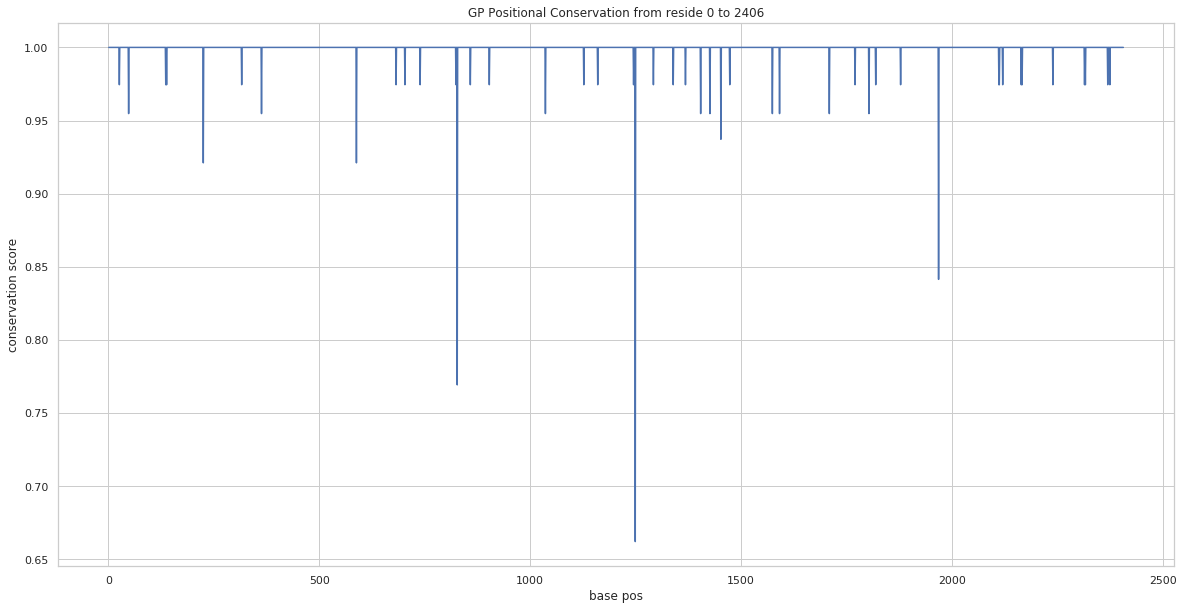

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

start = 0  
stop = 2406

x_range = df['base pos'][start:stop]
y_range = df['conservation score'][start:stop]

sns.set(style='whitegrid')

plt.figure(figsize=(20,10)) 
plot = sns.lineplot(x=x_range, y=y_range, data=df)
plot.set_title("GP Positional Conservation from reside " + str(start) + " to " + str(stop))

How does this look compared to the early outbreak plot we created in the lesson?

#### Great Job! 🤠